In [11]:
from netCDF4 import MFDataset,Dataset,num2date,date2num
import statsmodels.api as sm
from scipy.stats import  linregress
import numpy as np
import datetime as dt
import xarray as xr
import os

npth='J:/Reanalysis/myHadlSST_198001_202312_sst.nc'

sst=xr.open_dataset(npth).sst.loc[dict(lat=slice(-80,-60),time=slice('2005-01','2022-12'))]
sst=sst.where(sst<1000)
sst=sst.mean(dim=['lat','lon'])

In [12]:
model = sm.OLS(sst.values,np.arange(len(sst)))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.371
Method:                 Least Squares   F-statistic:                              128.4
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                    1.20e-23
Time:                        20:21:37   Log-Likelihood:                         -243.83
No. Observations:                 216   AIC:                                      489.7
Df Residuals:                     215   BIC:                                      493.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0047      0.000    -11.333      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       26.070   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.019
Skew:                           0.526   Prob(JB):                     0.000332
Kurtosis:                       2.179   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
m, b, r_value, p_value, std_err = linregress(np.arange(len(sst)), sst.values)

In [5]:
model = sm.OLS(sst.values,np.arange(len(sst))).fit()
std_err = np.sqrt(np.sum(model.resid_pearson ** 2) / (len(y) - len(X.columns)))
print(f'Standard Error of the Regression: {std_err:.2f}')


NameError: name 'y' is not defined

In [16]:
np.sqrt(np.sum(model.resid_pearson ** 2) )

22.781571499789038

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(sst))
y = sst.values
n = x.size

# calculate interval manually using the formula
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = (y-y_est).std() * np.sqrt(1/n + (x - x.mean())**2 / np.sum((x - x.mean())**2))
print(a)
print(b)


-0.0012608531135374346
-0.4873594169574853


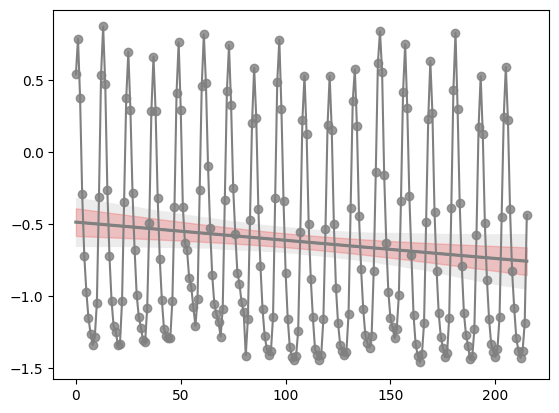

In [15]:
import seaborn as sns
fig, ax = plt.subplots()

# plot manually calculated interval (std interval) --- the blue one
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color='r')

# plot seaborn calculated interval (std interval, i.e. when ci=68.27) --- the orange one
sns.regplot(x=x, y=y, color='grey')

plt.plot(x,y, color='grey')

plt.show()

In [23]:
slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(sst)), sst.values)
print(m)
print(b)
print(r_value)
print(p_value)
print(std_err)
print(a)

-0.0012608531135374329
-0.4873594169574855
-0.11049985287615363
0.10532906006597703
0.000775225720897319
-0.0012608531135374346


In [75]:
sst=xr.open_dataset(npth).sst.loc[dict(lat=slice(-80,-30),time=slice('2005-01','2022-12'))]
sst=sst.where(sst<1000)

In [88]:
NC=sst.assign_coords({'TT':('time',range(len(sst.time)))})
NC=NC.swap_dims({"time":"TT"})
NC_s=NC.polyfit(dim='TT',deg=1,skipna=False)
fit = xr.polyval(NC.TT, NC_s.polyfit_coefficients)
Coef=NC_s.polyfit_coefficients[0]
Coef_var=Coef.values*12 # (m/year)
data_dt=NC-fit
data_dt=data_dt.swap_dims({"TT":"time"})

-0.0002819459298114854


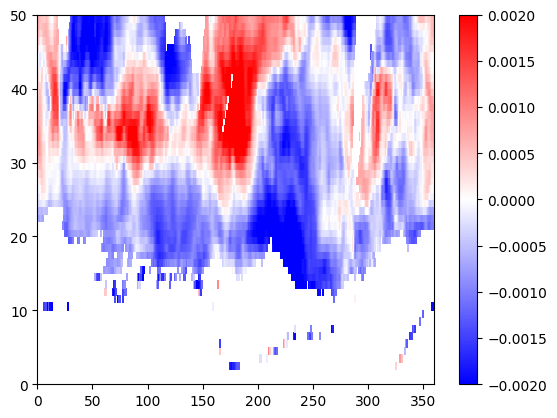

In [91]:
plt.pcolor(Coef.values,vmin=-0.002,vmax=0.002,cmap=plt.get_cmap('bwr'))
plt.colorbar()
print(np.nanmean(Coef.values))

0.0002426415158108955


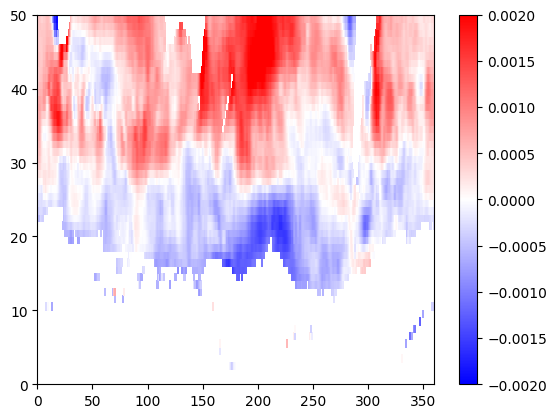

In [90]:
plt.pcolor(tmp,vmin=-0.002,vmax=0.002,cmap=plt.get_cmap('bwr'))
plt.colorbar()

print(np.nanmean(tmp))

In [67]:

# calculate interval manually using the formula
my=sst.values
T,A,O=my.shape
y=np.arange(T)
tmp=np.zeros([A,O])
for i in range(A):
    for j in range(O):
        if np.mean(my[:,i,j])!=np.mean(my[:,i,j]):
            tmp[i,j]=np.nan
        else:
            a,_=np.polyfit(y,my[:,i,j], deg=1)
            tmp[i,j]=a
        

In [58]:
y


array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [21.57028198, 21.52470779, 21.62590027, ..., 22.25699043,
         22.01142883, 21.77522278],
        [21.99029922, 21.92670059, 22.01374054, ..., 22.89670563,
         22.51155281, 22.2048893 ],
        [22.44848633, 22.36904526, 22.36247253, ..., 23.49919319,
         22.95162201, 22.59902573]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [22.40676308, 22.27745438, 22.19477081, ..., 2

In [60]:
tmp

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [1.8764166 , 2.20991285, 2.44040209, ..., 0.95668755, 1.13196315,
        1.43666863],
       [1.90659191, 2.24951744, 2.49656118, ..., 0.79918793, 1.10506916,
        1.47140704],
       [2.07255839, 2.3136338 , 2.44239474, ..., 1.10869817, 1.40690598,
        1.72533125]])